# Machine Learning with Time Series Data: Predicting Positive Price Movement of S&P 500 Comapnies

## Introduction
#### It can be cost Intensive to the unexperienced trader to constanstly buy and sell with the dynamic changes of the Market.  In this portion of the assignment, the target is to focus on price movement per quarter.  We want to determine if there will be a positive( > 5%) or negative (< 5%) price movement in the subsequent quarter. If so, the trader can decide to sell, and if not, the trader can decide to hold until there is such a change. 

## Stock Market Data Sources
### 1.) Quandl API is used to retrieve the following:
#### Open is the price of the stock at the beginning of the trading day (it need not be the closing price of the previous day).

#### High is the highest price of the stock at closing time.

#### Low is the lowest price of the stock on that trading day.

#### Close is the price of the stock at closing time.

#### Volume indicates how many stocks were traded.

#### Adjusted Close is the closing price of the stock that adjusts the price of the stock for corporate actions.
### 2.) Morningstar is used to obtain performance data.

# Process:
## 1.) Collecting Data
## 2.) Cleaning Data
## 3.) Selecting Machine Learning Model
## 4.) Down-Selecting Features
## 5.) Determining Accuracy of model

### Data is cleaned to handle any missing and/incomplete data
## 2.) A Correlation Matrix is used to determine if an correlations exists among the features and will help to down select features
## 3.) 

In [80]:
%matplotlib inline

In [81]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import numpy as np

import sqlalchemy as sa
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, exc
from sqlalchemy.sql import select, update, insert, table

from sqlalchemy.ext.declarative import declarative_base # extract classes into tables
from sqlalchemy import Column, Integer, String, Float, Date, MetaData 


In [82]:
features = pd.read_csv('features.csv')
target = pd.read_csv('target.csv')
target.head()

,date,adj_closeRatio,adj_openRatio,symbol
0,2013-09-30 00:00:00.000000,1.098112,1.092831,MMM
1,2013-09-30 00:00:00.000000,1.091889,1.056355,ABBV
2,2013-09-30 00:00:00.000000,1.023346,1.031476,ACN
3,2013-09-30 00:00:00.000000,1.169705,1.197849,ATVI
4,2013-09-30 00:00:00.000000,1.220349,1.188830,AYI


In [83]:
target_ = target.reset_index()
features_ = features.reset_index()
data = target_.merge(features_, on=['date', 'symbol'])
data

,index_x,date,adj_closeRatio,adj_openRatio,symbol,index_y,fiscalqtr,MarketCapBasic,TotalRevenue,CommonStock,...,TotalStockholdersEquity,EBIT,DebttoEquity,GrossMarginPctTTM,OperatingMarginPctTTM,BasicEPSNetIncome,PriceEarningsTTM,PriceEarningsFY,PriceBookFQ,ROA
0,0,2013-09-30 00:00:00.000000,1.098112,1.092831,MMM,0,Q3,1.301056e+11,7.916000e+09,9.000000e+06,...,1.779600e+10,1.739000e+09,0.32462,0.4946,0.2285,1.81,27.4590,28.9508,11.5381,0.069117
1,1,2013-09-30 00:00:00.000000,1.091889,1.056355,ABBV,1,Q3,1.477896e+11,4.658000e+09,1.600000e+07,...,3.577000e+09,1.371000e+09,4.14006,0.7505,0.3399,0.60,28.0606,29.2175,29.1226,0.269500
2,2,2013-09-30 00:00:00.000000,1.023346,1.031476,ACN,2,Q3,9.416723e+10,7.707935e+09,7.500000e+04,...,5.324867e+09,1.141971e+09,0.00000,0.2990,0.1260,1.25,26.7856,23.5180,10.3276,0.152165
3,3,2013-09-30 00:00:00.000000,1.169705,1.197849,ATVI,3,Q3,4.999020e+10,6.910000e+08,0.000000e+00,...,1.213900e+10,7.000000e+07,0.18214,0.6436,0.1865,0.05,184.1667,175.8889,5.3673,0.004613
4,4,2013-09-30 00:00:00.000000,1.220349,1.188830,AYI,4,Q3,5.296302e+09,5.415000e+08,5.000000e+05,...,9.226000e+08,5.000000e+07,0.38316,0.4174,0.1393,0.74,15.8329,23.6984,3.2456,0.034359
5,5,2013-09-30 00:00:00.000000,1.140035,1.119809,ADBE,5,Q3,1.108318e+11,9.951190e+08,6.100000e+04,...,6.834759e+09,1.103540e+08,0.22237,0.8659,0.3120,0.16,60.0640,52.3382,13.0289,0.012144
6,6,2013-09-30 00:00:00.000000,0.933824,0.928922,AMD,6,Q3,9.510480e+09,1.461000e+09,7.000000e+06,...,4.340000e+08,9.500000e+07,4.72120,0.3421,0.0383,0.06,249.7500,257.0000,16.9879,0.110599
7,7,2013-09-30 00:00:00.000000,1.019363,1.017382,AAP,7,Q3,7.662261e+09,1.520144e+09,7.000000e+03,...,1.467848e+09,1.707240e+08,0.41221,0.4358,0.0608,1.42,16.1620,15.4798,2.2516,0.070736
8,8,2013-09-30 00:00:00.000000,1.112005,1.121307,AES,8,Q3,7.644137e+09,3.996000e+09,8.000000e+06,...,4.813000e+09,8.000000e+08,4.37066,0.2340,0.1561,0.09,-6.6023,-6.1534,3.1163,0.014752
9,9,2013-09-30 00:00:00.000000,1.201336,1.189269,A,9,Q3,2.181865e+10,1.652000e+09,6.000000e+06,...,4.787000e+09,2.360000e+08,0.56424,0.5433,0.1893,0.50,114.4915,32.0896,4.8250,0.035095


In [84]:
Base = declarative_base() 
engine = create_engine('sqlite:///stockAI.sqlite')
conn = engine.connect()
Base = automap_base()
Base.prepare(engine=engine, reflect=True)
session = Session(bind=engine)
with conn:
    sql="Select date, adj_open, adj_close, symbol FROM historicalprice ORDER BY date"
    df_target = pd.read_sql_query(sql, conn)
    
    sql="Select date, fiscalqtr, MarketCapBasic, TotalRevenue, CommonStock, NetIncome, TotalCurrentAssets, TotalCurrentLiabilities, TotalStockholdersEquity, symbol, EBIT, DebttoEquity, GrossMarginPctTTM, OperatingMarginPctTTM, BasicEPSNetIncome FROM performancedata ORDER BY date"
    df_features = pd.read_sql_query(sql, conn)
    
df_target['symbol']= df_target['symbol'].str.upper()

all_data = df_target.merge(df_features, on= ['date', 'symbol']).set_index('date') 
all_data.head()

,adj_open,adj_close,symbol,fiscalqtr,MarketCapBasic,TotalRevenue,CommonStock,NetIncome,TotalCurrentAssets,TotalCurrentLiabilities,TotalStockholdersEquity,EBIT,DebttoEquity,GrossMarginPctTTM,OperatingMarginPctTTM,BasicEPSNetIncome
date,,,,,,,,,,,,,,,,
2013-06-30 00:00:00.000000,98.902568,98.443435,MMM,Q2,1.301056e+11,7.752000e+09,9.000000e+06,1.197000e+09,1.398300e+10,6.335000e+09,1.787600e+10,1.702000e+09,0.33262,0.4946,0.2285,1.74
2013-06-30 00:00:00.000000,31.969456,31.589083,ABT,Q2,1.044704e+11,5.446000e+09,1.173095e+10,4.760000e+08,1.983112e+10,1.091961e+10,2.233606e+10,6.270000e+08,0.35523,0.5661,0.0906,0.30
2013-06-30 00:00:00.000000,36.326633,35.310205,ABBV,Q2,1.477896e+11,4.692000e+09,1.600000e+07,1.068000e+09,1.566200e+10,6.805000e+09,3.558000e+09,1.453000e+09,4.14784,0.7505,0.3399,0.67
2013-06-30 00:00:00.000000,13.488746,13.788496,ATVI,Q2,4.999020e+10,1.050000e+09,0.000000e+00,3.240000e+08,5.629000e+09,1.193000e+09,1.193500e+10,4.300000e+08,0.00000,0.6436,0.1865,0.28
2013-06-30 00:00:00.000000,45.990000,45.560000,ADBE,Q2,1.108318e+11,1.010549e+09,6.100000e+04,7.654600e+07,4.557657e+09,1.264855e+09,6.927302e+09,1.113090e+08,0.22024,0.8659,0.3120,0.15


## Correlation Matrix
#### The Correleation Matrix is used to determine which features have the strongest correlations and is used for selecting the features that will allow the best performance or produce the highest accuracy of the Machine Learning model. 

#### Feature pairs with a correlation of 60% or higher are selected.

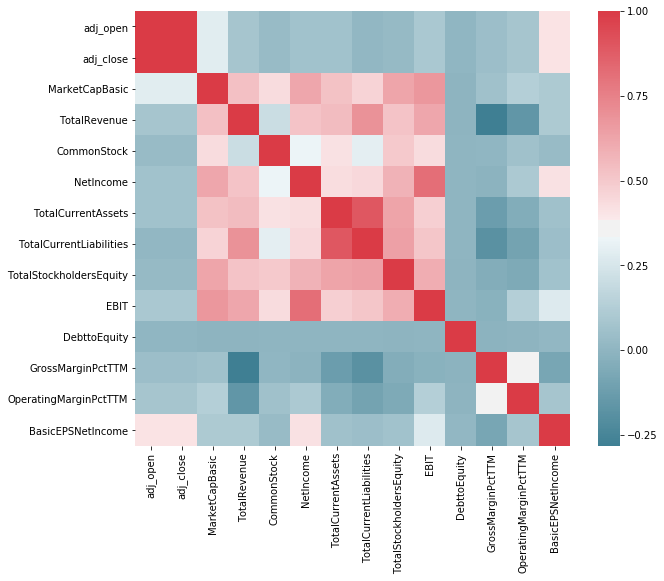

In [85]:
f, ax = plt.subplots(figsize=(10, 8))
corr = all_data.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

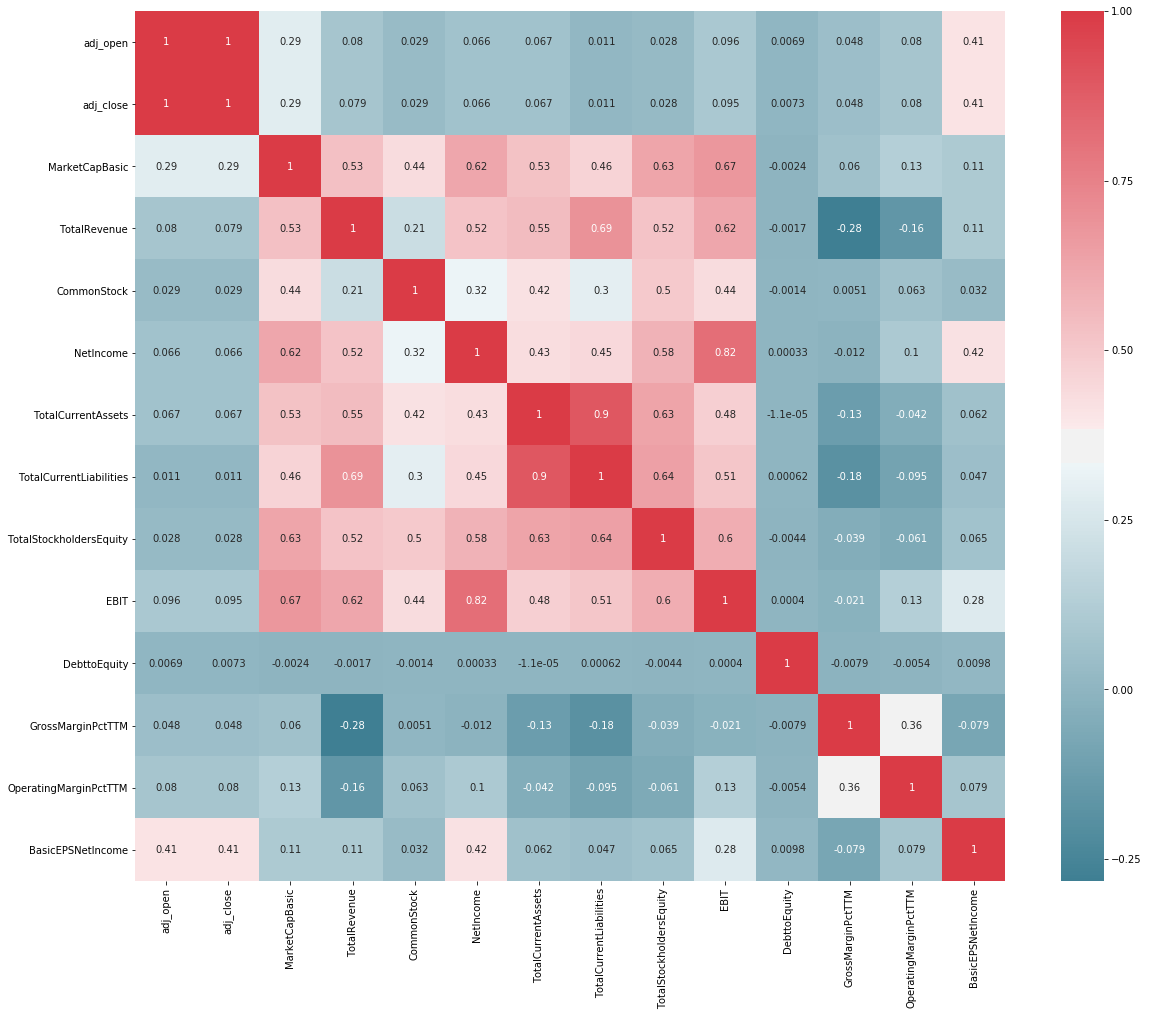

In [191]:
f, ax = plt.subplots(figsize=(20, 16))
corr = all_data.corr()
sns.heatmap(corr, annot=True, fmt='.2g', mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

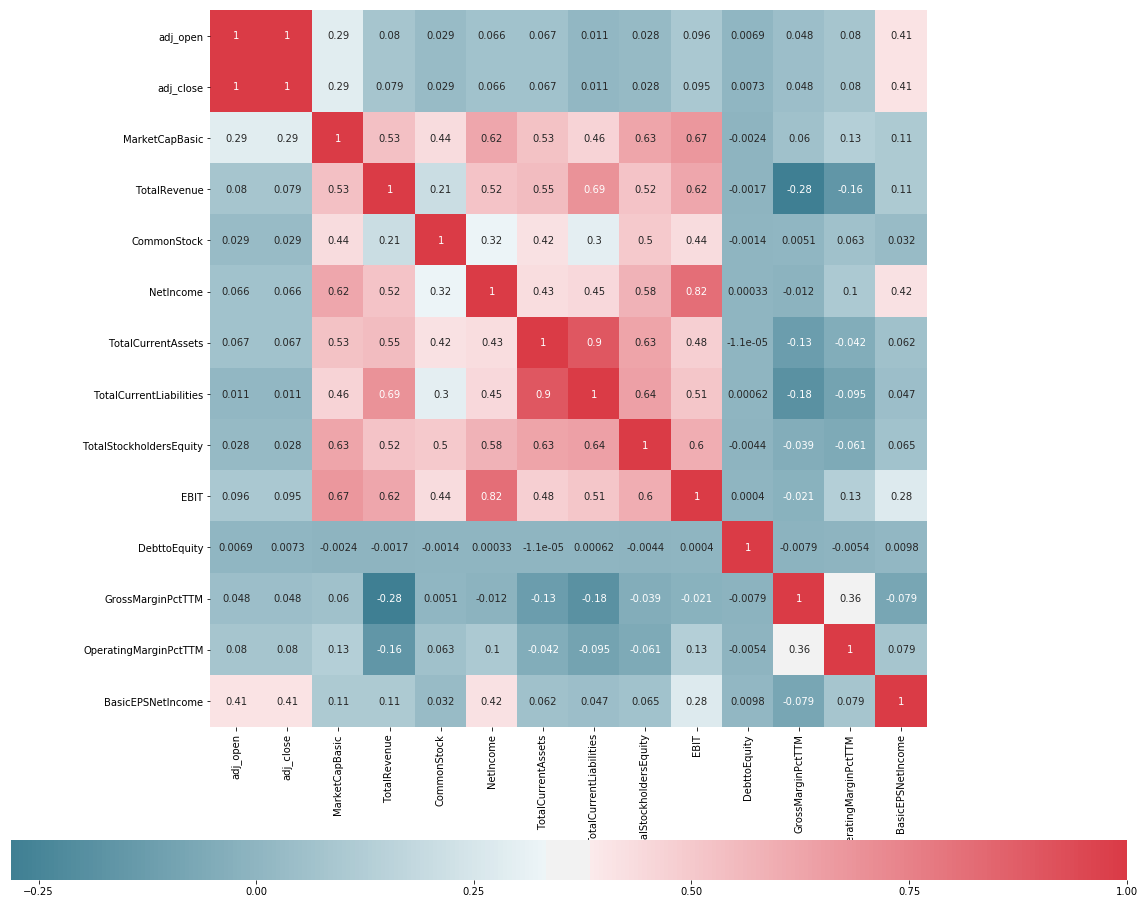

In [213]:
grid_kws = {"height_ratios": (.9, .05), "hspace": .3}
f, (ax, cbar_ax) = plt.subplots(2, figsize=(20, 16), gridspec_kw=grid_kws)
corr = all_data.corr()
corr_mat = sns.heatmap(corr, annot=True, fmt='.2g', mask=np.zeros_like(corr, dtype=np.bool),
                       cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax, cbar_ax=cbar_ax, cbar_kws={"orientation": "horizontal"})
figure = corr_mat.get_figure()    
figure.savefig('corr_matrix.jpg')#, dpi=400)

In [87]:
core = all_data.corr() # df is the pandas dataframe
c1 = corr.abs().unstack()
c1_=c1.sort_values(ascending = False)
corr_sort = pd.DataFrame(c1_, columns=['corr_fact'])
corr_sort.where(corr_sort['corr_fact']<1).dropna()# and corr_sort['corr_fact']>.7)

,,corr_fact
adj_open,adj_close,0.999886
adj_close,adj_open,0.999886
TotalCurrentAssets,TotalCurrentLiabilities,0.898611
TotalCurrentLiabilities,TotalCurrentAssets,0.898611
EBIT,NetIncome,0.819564
NetIncome,EBIT,0.819564
TotalCurrentLiabilities,TotalRevenue,0.691483
TotalRevenue,TotalCurrentLiabilities,0.691483
MarketCapBasic,EBIT,0.674996
EBIT,MarketCapBasic,0.674996


In [88]:
def classify(x):
    result = {'adj_open': x['adj_open'], 'adj_close': x['adj_close'], \
              'TotalCurrentAssets': x['TotalCurrentAssets'], 'TotalCurrentLiabilities': x['TotalCurrentLiabilities'],\
              'EBIT': x['EBIT'], 'NetIncome': x['NetIncome'], 'TotalRevenue': x['TotalRevenue'],\
              'TotalStockholdersEquity': x['TotalStockholdersEquity'],\
              'MarketCapBasic': x['MarketCapBasic'], 'symbol': x['symbol'], 'date': x['date'], \
              'fiscalqtr': x['fiscalqtr'], 'BasicEPSNetIncome': x['BasicEPSNetIncome'], \
                'adj_openRatio': x['adj_open']/x['adj_open'].shift(1), \
                'adj_closeRatio': x['adj_close']/x['adj_close'].shift(1),\
                'per_chng': ((x['adj_close']-x['adj_close'].shift(1))/x['adj_close'])*100
    }
    return pd.DataFrame(result)
def mapclass(x):
    if x > 5.0: 
        return 'Good' 
    else: 
        return 'Bad'


In [89]:
data_cleaned = all_data[['adj_open','adj_close','MarketCapBasic','TotalCurrentAssets','TotalCurrentLiabilities','EBIT','NetIncome','TotalRevenue','TotalStockholdersEquity','symbol','fiscalqtr', 'BasicEPSNetIncome']]
data_cleaned = data_cleaned.reset_index()
df_target__ = data_cleaned.groupby(['symbol']).apply(lambda x: classify(x)).dropna()
df_target__['class'] = df_target__['per_chng'].apply(mapclass)
df_target__.where(df_target__.symbol == 'GOOGL').dropna()

,BasicEPSNetIncome,EBIT,MarketCapBasic,NetIncome,TotalCurrentAssets,TotalCurrentLiabilities,TotalRevenue,TotalStockholdersEquity,adj_close,adj_closeRatio,adj_open,adj_openRatio,date,fiscalqtr,per_chng,symbol,class
380,4.45,3.761000e+09,7.428097e+11,2.970000e+09,6.885800e+10,1.447500e+10,1.375400e+10,8.298900e+10,439.311111,0.994934,435.885537,0.993348,2013-09-30 00:00:00.000000,Q3,-0.509185,GOOGL,Bad
767,4.76,4.429000e+09,7.428097e+11,3.189000e+09,7.288600e+10,1.590800e+10,1.570700e+10,8.730900e+10,562.090118,1.279481,557.842005,1.279790,2013-12-31 00:00:00.000000,Q4,21.843296,GOOGL,Good
1179,5.13,4.115000e+09,7.428097e+11,3.452000e+09,7.531400e+10,1.627000e+10,1.542000e+10,9.171100e+10,558.980519,0.994468,566.950121,1.016327,2014-03-31 00:00:00.000000,Q1,-0.556298,GOOGL,Bad
1616,4.96,4.258000e+09,7.428097e+11,3.351000e+09,7.790500e+10,1.709700e+10,1.595500e+10,9.574900e+10,584.670000,1.045958,586.760000,1.034941,2014-06-30 00:00:00.000000,Q2,4.393843,GOOGL,Bad
2054,4.05,3.724000e+09,7.428097e+11,2.739000e+09,8.011500e+10,1.792000e+10,1.652300e+10,9.881500e+10,588.410000,1.006397,587.490000,1.001244,2014-09-30 00:00:00.000000,Q3,0.635611,GOOGL,Bad
2494,6.89,4.399000e+09,7.428097e+11,4.675000e+09,7.865600e+10,1.677900e+10,1.810300e+10,1.038600e+11,530.660000,0.901854,537.740000,0.915318,2014-12-31 00:00:00.000000,Q4,-10.882674,GOOGL,Bad
2934,5.16,4.447000e+09,7.428097e+11,3.515000e+09,8.031300e+10,1.433600e+10,1.725800e+10,1.084480e+11,554.700000,1.045302,557.940000,1.037565,2015-03-31 00:00:00.000000,Q1,4.333874,GOOGL,Bad
3375,4.99,4.825000e+09,7.428097e+11,3.931000e+09,8.416400e+10,1.736200e+10,1.772700e+10,1.117830e+11,540.040000,0.973571,545.090000,0.976969,2015-06-30 00:00:00.000000,Q2,-2.714614,GOOGL,Bad
3817,5.80,4.708000e+09,7.428097e+11,3.979000e+09,8.810300e+10,1.845700e+10,1.867500e+10,1.162410e+11,637.200000,1.179913,631.830000,1.159130,2015-09-30 00:00:00.000000,Q3,15.247960,GOOGL,Good
4261,7.16,5.380000e+09,7.428097e+11,4.923000e+09,9.011400e+10,1.931000e+10,2.132900e+10,1.203310e+11,778.010000,1.220982,787.820000,1.246886,2015-12-31 00:00:00.000000,Q4,18.098739,GOOGL,Good


In [245]:
# loading libraries
import numpy as np
from sklearn import preprocessing
from sklearn.cross_validation import train_test_split

# create design matrix X and target vector y
X = np.array(df_target__.iloc[:, :12]) # end index is exclusive
y = np.array(df_target__['class']) # another way of indexing a pandas df

# binarize target
lb = preprocessing.LabelBinarizer()
yb = lb.fit_transform(y)

# split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [257]:
# loading library
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.feature_extraction import DictVectorizer

# instantiate learning model (k = 3)
knn = KNeighborsClassifier(n_neighbors=12)

# fitting the model
knn.fit(X_train, y_train)

# predict the response
pred = knn.predict(X_test)

# evaluate accuracy
cm = confusion_matrix(y_test, pred, labels=['Good', 'Bad'])
print(accuracy_score(y_test, pred))
print("Confusion Matrix:\n")
print(cm)

0.5400098183603338
Confusion Matrix:

[[214 700]
 [237 886]]


In [247]:
# creating odd list of K for KNN
myList = list(range(1,50))

# subsetting just the odd ones
neighbors = list(filter(lambda x: x % 2 != 0, myList))

# empty list that will hold cv scores
cv_scores = []

# perform 10-fold cross validation
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())

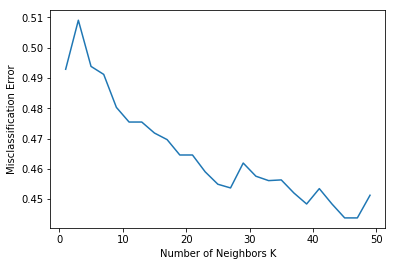

In [248]:
# changing to misclassification error
MSE = [1 - x for x in cv_scores]

# determining best k
optimal_k = neighbors[MSE.index(min(MSE))]
#print("The optimal number of neighbors is %d" % optimal_k)

# plot misclassification error vs k
plt.plot(neighbors, MSE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.savefig('k_plot.jpg')
plt.show()   

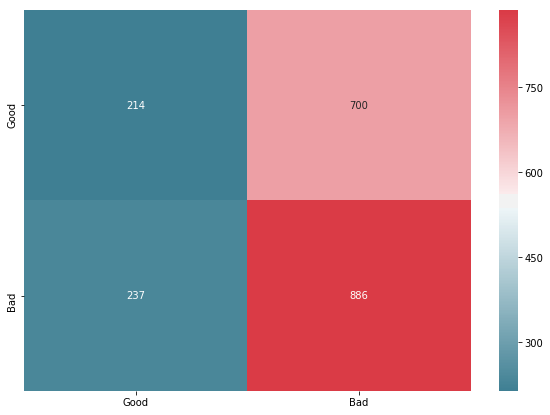

In [268]:
df_cm = pd.DataFrame(cm, index = [i for i in ['Good', 'Bad']],
                  columns = [i for i in ['Good', 'Bad']])
plt.figure(figsize = (10,7))
final = sns.heatmap(df_cm, fmt='2g', annot=True, cmap=sns.diverging_palette(220, 10, as_cmap=True))
figure = final.get_figure()    
figure.savefig('results.jpg')

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  from ipykernel import kernelapp as app


ValueError: c of shape (6172,) not acceptable as a color sequence for x with size 6172, y with size 6172

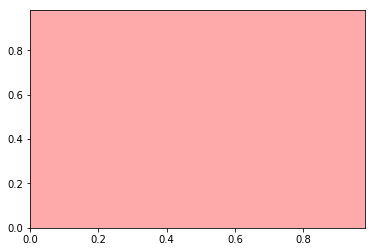

In [256]:
from sklearn import neighbors
# we only take the first two features. We could avoid this ugly
# slicing by using a two-dim dataset
X = np.array(df_target__.iloc[:, :2]) # end index is exclusive
y = np.array(df_target__['class']) # another way of indexing a pandas df
yb = lb.fit_transform(y)

h = .02  # step size in the mesh

# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

clf = neighbors.KNeighborsClassifier(n_neighbors=15)
clf.fit(X, yb)
# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1#df_target__['per_chng'].min() - 1, df_target__['per_chng'].max() + 1
x_min = 0.0; x_max = 1.0
y_min = 0.0; y_max = 1.0
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), 
                     np.arange(y_min, y_max, h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold,
            edgecolor='k', s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("3-Class classification (k = %i, weights = '%s')"
          % (n_neighbors, weights))

plt.show()

In [215]:
y_min

-11277000001.0

In [179]:
yy.shape

(3041, 3041)

In [180]:
xx.ravel().shape

(9247681,)

In [107]:
lby=lb.fit_transform(y)

In [112]:
lby.shape

(6172, 1)

In [156]:
yy.shape

(50, 50)

In [97]:
lb.classes_

array(['Bad', 'Good'], dtype='<U4')

In [117]:
yb_min, yb_max = X[:, 1].min() - 1, X[:, 1].max() + 1

In [118]:
yb_min

-11277000001.0

['Bad' 'Bad' 'Bad' ... 'Good' 'Good' 'Good']


In [225]:
yb.shape#.reshape(-1,1).shape

(6172, 1)

In [230]:
X.shape

(6172, 2)

In [231]:
y.shape

(6172,)

In [233]:
yb

array([[1],
       [0],
       [1],
       ...,
       [0],
       [0],
       [0]])

In [235]:
from sklearn.metrics import confusion_matrix

In [242]:
pred

array([0, 0, 0, ..., 1, 1, 1])

array([[214, 700],
       [237, 886]], dtype=int64)